<a href="https://colab.research.google.com/github/advcloud/colabtest/blob/main/handmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cloning into 'handtest'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 42 (delta 10), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (42/42), done.
/content/handtest
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 3) 

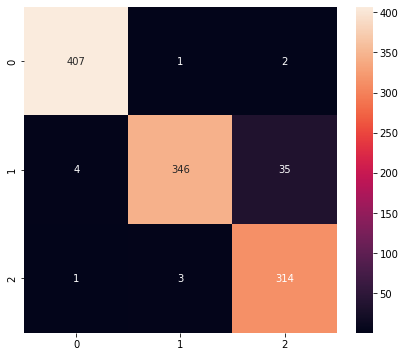

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       410
           1       0.99      0.90      0.94       385
           2       0.89      0.99      0.94       318

    accuracy                           0.96      1113
   macro avg       0.96      0.96      0.96      1113
weighted avg       0.96      0.96      0.96      1113

INFO:tensorflow:Assets written to: /tmp/tmpq31988lk/assets


In [1]:
#claireye.com.tw
!git clone https://github.com/advcloud/handtest.git
%cd handtest
import keypoint_classification

In [2]:
model = keypoint_classification.tf.keras.models.load_model(keypoint_classification.model_save_path)

In [3]:
predict_result = model.predict(keypoint_classification.np.array([keypoint_classification.X_test[0]]))
print(keypoint_classification.np.squeeze(predict_result))
print(keypoint_classification.np.argmax(keypoint_classification.np.squeeze(predict_result)))

[0.90809476 0.05546373 0.03644157]
0


In [4]:
interpreter = keypoint_classification.tf.lite.Interpreter(model_path=keypoint_classification.tflite_save_path)
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
interpreter.set_tensor(input_details[0]['index'], keypoint_classification.np.array([keypoint_classification.X_test[0]]))
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

In [5]:
print(keypoint_classification.np.squeeze(tflite_results))
print(keypoint_classification.np.argmax(keypoint_classification.np.squeeze(tflite_results)))

[0.90809476 0.05546375 0.03644159]
0


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 24)                792       
                                                                 
 dropout_3 (Dropout)         (None, 24)                0         
                                                                 
 dense_4 (Dense)             (None, 10)                250       
                                                                 
 dense_5 (Dense)             (None, 4)                 44        
                                                                 
Total params: 1,086
Trainable params: 1,086
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
21/32 [==================>...........] 

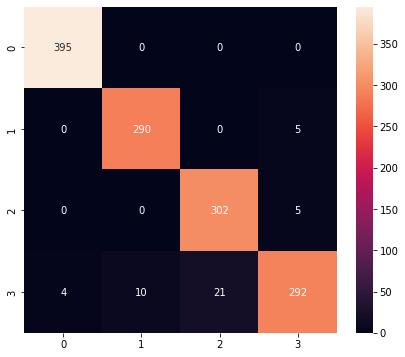

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       395
           1       0.97      0.98      0.97       295
           2       0.93      0.98      0.96       307
           3       0.97      0.89      0.93       327

    accuracy                           0.97      1324
   macro avg       0.96      0.96      0.96      1324
weighted avg       0.97      0.97      0.97      1324



INFO:tensorflow:Assets written to: /tmp/tmp44w0nvl1/assets


INFO:tensorflow:Assets written to: /tmp/tmp44w0nvl1/assets


In [6]:
import point_history_classification

In [7]:
model = point_history_classification.tf.keras.models.load_model(point_history_classification.model_save_path)
predict_result = model.predict(point_history_classification.np.array([point_history_classification.X_test[0]]))
print(point_history_classification.np.squeeze(predict_result))
print(point_history_classification.np.argmax(point_history_classification.np.squeeze(predict_result)))

[0.94107413 0.01690177 0.01174814 0.03027594]
0


In [8]:
interpreter = point_history_classification.tf.lite.Interpreter(model_path=point_history_classification.tflite_save_path)
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [9]:
interpreter.set_tensor(input_details[0]['index'], point_history_classification.np.array([point_history_classification.X_test[0]]))

In [10]:
%%time

interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 414 µs, sys: 0 ns, total: 414 µs
Wall time: 355 µs


In [11]:
print(point_history_classification.np.squeeze(tflite_results))
print(point_history_classification.np.argmax(point_history_classification.np.squeeze(tflite_results)))

[0.94107425 0.01690177 0.01174813 0.03027592]
0
